# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:** The environment is populated by several vehicles, the smartcab doesn't move at all at this stage, it is constantly receiving rewards accordingly to the state it is and the action it is taking (in this case, the action it is taking is to stay still), i can observe 3 different types os rewards, those are:

1 - Stay idle on a red light: Gives a positive reward;

2 - Stay idle on a green light with oncoming traffic: Gives a positive reward;

3 - Stay idle on a green light with no oncoming traffic: Gives a negative reward;

I'm expecting at least one more possible reward, that is when the cab reaches the goal once it starts moving.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:** 

** agent.py **

1 - Flag num_dummies: control the number of vehicles on the simulation;

2 - enforce_deadline: add a time based deadline to the simulator, ends simulation once it reaches 0%;

3 - update_delay: increase iteration speed;


**environment.py **

act(self, agent, action) is called, it decides what action to take, act if it's legal and receive the reward;

**simulator.py**

Both functions gives us the report of what is happening to the agent, but the render_text() is responsible for the outputs at the terminal and the render() is responsible for the GUI outputs.

**planner.py**

East - West directions will be considered first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


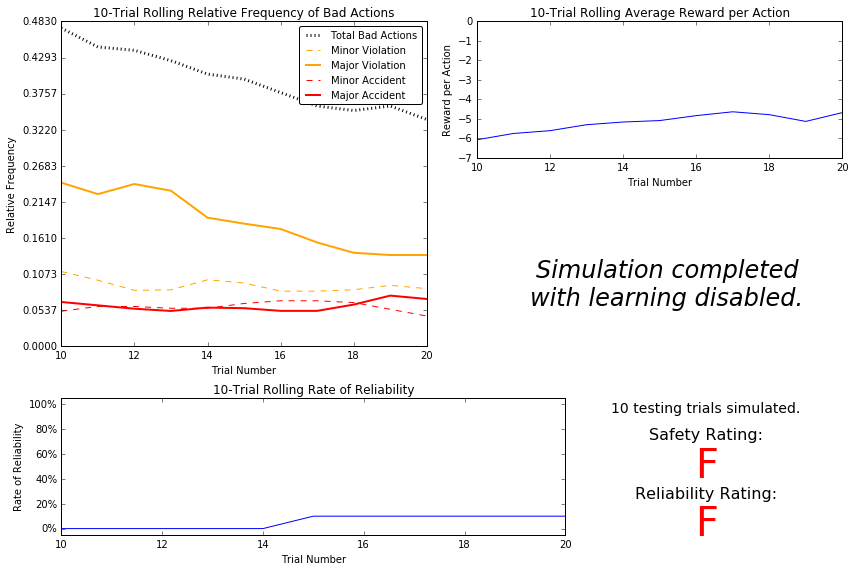

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:** The result was terrible, as you may expect from a cab that takes random actions.

As you can see on the first chart, the total of bad actions taken are almost 50%, with an average reward of -5 points for each simulation. The reliability is at the lowest rank, impressive it achieved around 20% but decreased later on, this was completely random.

From the chart, we can see that around 6% of the possible decisions for each state will cause a major accident, around the same amount of decisions will cause minor accidents, this will depend upon the traffic conditions.

Since the agent is taking random actions on every movement, this agent lacks the ability to learn, in fact this simulation doesn't even generate a log file to store the scores it gets from its actions, because of that, it doesn't matter how many trials we submit the agent, the outcome will be around the same.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:** The features related to safety are the following:

1 - light: Indicates the traffic light status, crossing a red light is a violation;

2 - oncoming: Indicates if there's a vehicle coming on your way, failing to identify this will result in an accident;

3 - left, right: Indicates the intented direction of the vehicles on the left / right from the smartcab;

The features related to efficiency are:

1 - waypoint: Indicates the best path for the vehicle to travel to reach its destination;

2 - deadline: Indicates the amount of time left to the smartcab to reach its destination;

I would consider the deadline as a efficiency feature, but not at this stage for learning, this would be a minor concern against the importance of the safety features.

On this project, i will consider the following variables: waypoint, light, oncoming, left and right, i will keep the deadline out because it has several possible values compared to the other features, it will increase my state space way too much.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** Possible values for each state:

- light=['Red','Green'];
- waypoint=['forward','left','right'];
- oncoming=['forward','left','right','none'];
- left=['forward','left','right','none'];
- right=['forward','left','right','none'];
- deadline=[n];

since i'm not considering the deadline, so the formula is;

size = 2(light) x 3(waypoint) x 4(oncoming + left + right) = 384

I believe that is reasonable to think that he can learn all the possible policies if we increase the number of trials considerably, but i don't think it is possible with 10 trials like we did.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

This chart was done using the iteration update rule


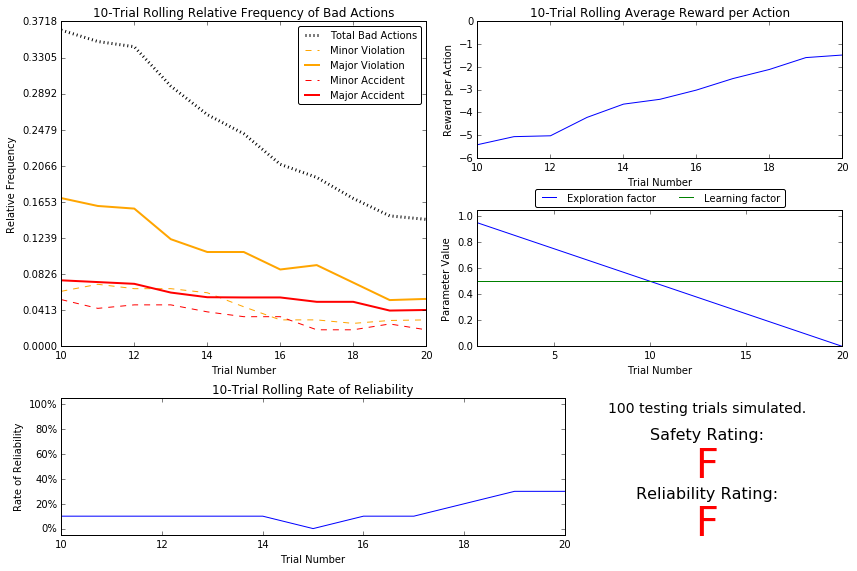

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
print 'This chart was done using the iteration update rule'

vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:** The basic driving agent was taking decisions randomly forever, never actually learning anything in the process, the outputs was not storing any kind of information about what happened in previous iterations, while the Q-Learning agent, although started the process randomly, because of the linear decay of the epsilon variable, started to take less and less random actions as the iterations went forward. Because the question demands me to restrain my training iterations to 20 (that is because of the  epsilon_{t+1} = epsilon_{t} - 0.05) the grades are still F and F, but it is possible to see from the charts that the number of bad decisions is already started to decrease, in fact i did changed this variable to 0.01, the result was the following:

default learning with 100 iterations


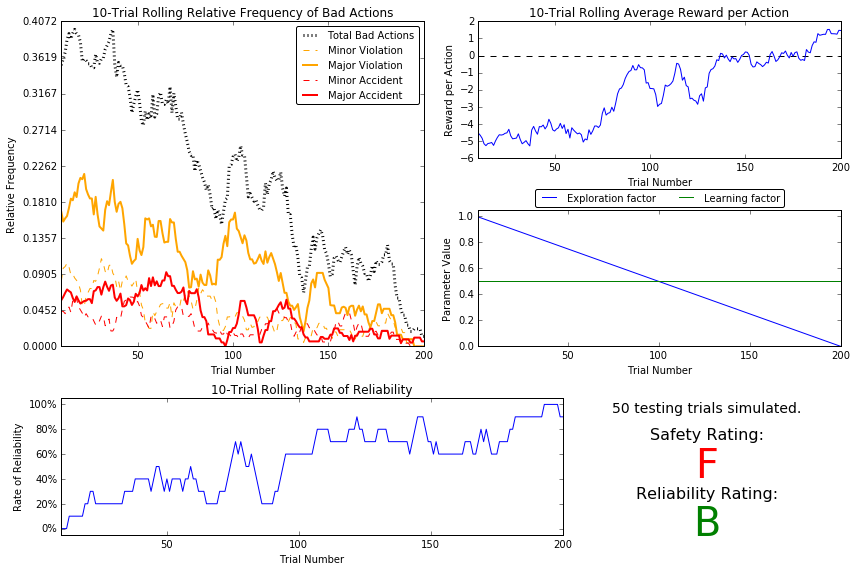

In [5]:
print 'default learning with 100 iterations'

vs.plot_trials('sim_default-learning3.csv')

As you can see, with just 80 more iterations the reliability jumped to B, along with the average reward, who jumped from ~-5 to 1. The safety still needs to be improved, i could easily give the algorithm more iterations to train and see if it would work, but let's see what the third step of this project will ask me to do to improve this algorithm even better.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

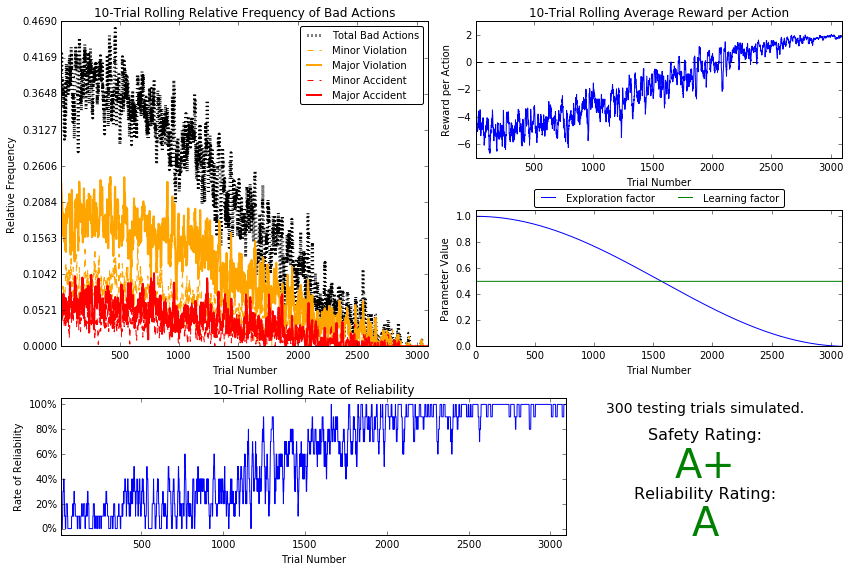

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:** I tried several different decay functions, the one at the charts is:

$$ \epsilon = cos^2(0.0005*t) $$

because i wanted to have around 3000 training points, i've set the epsilon tolarance at 0.0005, solving this for t we will get:

$$ 0.0005 = cos^2(0.0005*t),$$

$$t = 3097$$

with alpha set at 0.5, since this model is non stationary, i wanted to keep the learning rate constant.

you can see at the file agent.py that i experimented with several different decay functions, i selected this one because it shows a curve that holds into the randomness for a while and slowly dacay to better Q values, this way i could assure that my agent would test several states before start taking more accurate decisions. I also wanted to keep the test/training rate around 10% and still get good grades for safety and reliability, that proved to be quite a challange, so i had to tweak the parameters a lot to get those results.
The improvement is considerable from the previous section, the use of a decay function let the agent to gradually decrease its randomness rate, instead of the linear one we had before.

I'm pretty satisfied with the results, A+ for safety means that my agent only took right actions in 300 different test cases, as per the reliability, analyzing log i can see that out of 300 tests, only one failed.


| trial | testing |	parameters       | initial_deadline | final_deadline | net_reward                   | actions | success |
| :---: | :-----: | :--------------: | :--------------: | :------------: | :-------------------: | :------------: | :-----: |
| 272   | TRUE    | {'a': 0, 'e': 0} | 30         | 0   | 4.444.993.827.990.760 | {0: 30, 1: 0, 2: 0, 3: 0, 4: 0} | 0       |


If we compare this results with the one from the default Q-learner, we can see the effect of the decaying function, by ensuring that the epsilon stays with higher values at the beggining of the tests and stay with lower values at the end, we ensure that it will explore the enviroment better at the beggining and use more of what it learned at the end. The improvement was substantial, the average score stabilized around 2 points once the agent started to use more and more of what it learned, decreasing the number of violations more smootlhly than the blunt default Q-learning method.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** The following heatmap were made with the policy matrix (sim_improved-learning.txt) of the possible states i've defined, each symbol mean one possible status for that state, that will be translated as:
<img src="images/legend.png">

Although we have 6 segments below, they represent just one, i separeted them in 6 just to make it visually better.

The coluns are: 
- **waypoint:** indicate what path the agent should go;
- **light:** the status of the light
- **oncoming, car left, car right** represent the intended path of the car, located ahead, on the left, on the right, respectivelly

- **Policy** the 4 coluns below Policy, are the available actions of the agent, the color of the cell represents if that action is a good action (it will be greener) or if it is a bad action (it will be redder), if you wish to see the actual values, please check the excel sheet at **logs/sim_improved-learning.xlsx**

Now that we know what this represents, lets check some samples;

First thing that i noticed with this chart, is that if you look to the segment 2,4 and 6, you can see that they all have the **light** value as **red**, so using the common sense, you can theorize that you **should not** move at those segments if there's oncoming traffic on the left, if you check the color of the cells, you will see that for the whole segment, the greener ones are the ones that the agent stay still, action that makes absolutely sense. For the purposes of this exercise, crossing a red light is **not acceptable** if there's a vehicle on the left, it will result in a serious decrease of our safety KPI, we absolutely don't want that, although we still have some faded green/yellow policies at those segments, so, let's analyze a few of them:

(just find the cell value, just like excel)
- **AZ11, AZ14** Those ones are pretty green, why? 
- - **AZ11:** So, the waypoint is telling us to go right, at AZ11, we don't have cars at the left, there's a car oncoming that is going forward, so we won't hit it and still we are one step closer to our goal, so this explains the positive value for this action.
- - ** AZ14:** Waypoint still says right (in fact for the whole AZ column), but this time we have cars at all directions, let's check their trajectories to see if it justify:
- - - **oncoming:** this one is going forward, since we are taking a right turn, we won't colide with this one;
- - - **car left:** this one is taking a right turn, since we are taking a right turn also, he won't colide with us, in fact he's taking the same path as the car that is oncoming, but that is not our agent concern;
- - - **car right:** this car is taking a turn to it's right, this means that he also won't be on our way;
- - **AZ14:** althought there's 4 cars at this crossway, none of them are coliding with our agent, (they are coliding with themselves though), this means that even if we cross this red light, we did not engaged ourselves into a major accident and also we are one step closer to our goal. If you check the whole 14 line (AY14 to BB14), you will see that AZ14 is better than BB14, this means that the agent thinks that it is better to cross this red light (AZ14) and take a right turn than to stay still (BB14), so we just bumped into one of the suboptimal policies for a specific state, mentioned before question 8. 

In fact, breaking out of that cells and considering the whole segments 2, 4 and 6, if we calculate how many policies we have where the light is red and we are still crossing it to take a right turn, we will get this **(check tab red light analyzer at the xlsx)**

$$ \hspace{10px}\textrm{Possibilities } = 576$$
$$ \hspace{10px}\textrm{Moving FORWARD in a red light } = 3$$
$$ \hspace{10px}\textrm{Moving LEFT in a red light } = 31$$
$$ \hspace{10px}\textrm{Moving RIGHT in a red light } = 1$$

$$ \hspace{10px}\textrm{Moving } / \hspace{10px}\textrm{Possibilities } = 6 \%\ $$ 

$$ \hspace{10px}\textrm{Moving other than right} / \hspace{10px}\textrm{Possibilities } = 0.7 \%\ $$ 


So, 0.7% of the policies for red lights, we will move at a red light to in a way other than the right.

Lets change the focus to the other segments;

<img src="images/grid.png">



First thing i want to try is to average all the possible policies per waypoint, let's see if, in general, follow the waypoint is the best option; **(check tab avg Policy at the xlsx)**

<img src="images/avgpolicy.png">

Well, that's interesting, so we have:
- Going forward when the waypoint is pointing forward gives us the best average score;
- Going right when the waypoint is pointing right gives us the best average score;
- Staying still gives us a lesser negative average score, (that is because of the green light);


- Going left gives us terrible scores for all waypoints, this one is a little tricky to understand, this happens because of the nature of the intersection, like this:

<img src="images/path.png">

As you can see, the agent cross almost every vehicle's possible path, that makes it a very dangerous move, but still, if you check the big table above, you will see that from around line 17 to line 47, when the vehicles don't cross this path, the score indicates that its safe to go. The value got very negative because of the number of possible accidents involving this pathway, whowever, if we were in UK or India, we would see the same phenomenon at the right turn, and the left one would be green.

Let's analyze a few of the policies:

<img src="images/examples.png">

- **Line 2:** At this configuration, the oncoming vehicle and the left vehicle are taking the path forward, the vehicle at our left is taking a left turn, at this state, going forward and going right are the safe options available, taking a left turn will almost always result in an accident for the green lights, one thing that got my attention was the cell 2Q, it is unusually orange, it should be red as the other ones, because that configuration will certainly causes an accident, so i went to check the policy matrix and found out that that particular policy is pointing with the score 0, this means that this particular policy wasn't trained by my agent, still, the optimal policy was trained, (staying still at the red light) so, while testing, my agent would take the optimal policy for this particular state.

| Line | Green light                    | Red light                    |
| :--: | :----------------------------: | :--------------------------: |
| 2    | <img src="images/17green.png"> | <img src="images/17red.png"> |


- **Line 43:** At this configuration, there are no other vehicles to interact with the agent, this makes the path that follows the waypoint the best one in all states when the light is green, in case of a red light, staying still is the best option, but we can also observe that in the last section, when the waypoint is leading us to the right, taking the right actually gives us a slightly better score than staying still, this is because accordingly to the US laws, one may turn right at a red light if there's no vehicle on oncoming traffic.

| Line | Green light                    | Red light                    |
| :--: | :----------------------------: | :--------------------------: |
| 43   | <img src="images/43green.png"> | <img src="images/43red.png"> |

- **Line 57:** At this configuration, there are no vehicles coming from the our left, the oncoming vehicle is taking a right turn and the vehicle on our right is going forward, with this state, if the light is green for us, we should be safe to go forward or right, the left turn is taken by the vehicle oncoming, in fact you can see that the left option is giving us negative scores, while the other options are green, especially if we follow the waypoint. For the red lights, you can see that if we try to cross the light, we will crash with the vehicles if we go forward or left, going right will give us a negative score because of the traffic violation, so for those cases, staying still is the best option.

| Line | Green light                    | Red light                    |
| :--: | :----------------------------: | :--------------------------: |
| 57   | <img src="images/57green.png"> | <img src="images/57red.png"> |

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.